In [1]:
import pandas as pd
import numpy as np
import csv

In [32]:
amazon_data = pd.read_csv('E:\\Information Systems\\FinanceML\\Data\\Equity_Group\\AMZN.csv')
amazon_data

,Date,Open,High,Low,Close,Volume
0,04-Jan-16,672.32,672.32,627.51,639.10,69804
1,05-Jan-16,638.05,646.91,627.65,634.25,44335
2,06-Jan-16,623.77,639.79,618.64,635.20,40167
3,07-Jan-16,620.55,630.00,605.21,606.00,54784
4,08-Jan-16,617.05,624.14,606.00,608.36,42130
5,11-Jan-16,612.00,619.85,598.57,617.51,75915
6,12-Jan-16,620.84,625.99,612.24,619.28,36843
7,13-Jan-16,623.00,623.50,579.16,580.00,60233
8,14-Jan-16,583.33,602.25,569.88,597.00,57738
9,15-Jan-16,592.99,592.99,565.30,570.70,58903


In [33]:
amazon_trial = amazon_data[['Date','Close']]

In [46]:
from pandas import Series
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = Series.from_csv('E:\\Information Systems\\FinanceML\\Data\\Equity_Group\\AMZN_trial.csv', header=0)
# prepare situation
X = series.values
window = 10
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
spread_high = list()
spread_low = list()
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=610.740000, expected=575.000000
predicted=604.330000, expected=575.000000
predicted=598.405000, expected=573.250000
predicted=592.210000, expected=597.410000
predicted=591.351000, expected=598.220000
predicted=590.337000, expected=598.200000
predicted=588.406000, expected=596.000000
predicted=586.078000, expected=550.000000
predicted=583.078000, expected=586.500000
predicted=582.028000, expected=575.000000
predicted=582.458000, expected=551.000000
predicted=580.058000, expected=532.200000
predicted=575.778000, expected=529.330000
predicted=571.386000, expected=499.500000
predicted=561.595000, expected=484.050000
predicted=550.178000, expected=484.000000
predicted=538.758000, expected=495.000000
predicted=528.658000, expected=504.100000
predicted=524.068000, expected=507.200000
predicted=516.138000, expected=523.210000
predicted=510.959000, expected=534.400000
predicted=509.299000, expected=524.760000
predicted=508.555000, expected=535.980000
predicted=509.220000, expected=558

C:\Users\TEJESH\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [53]:
std_dev = np.std(amazon_data['Close'])
print("std  : ", std_dev)
spread = std_dev*0.05
print(spread)
std_high = [spread + predictions[i] for i in range(len(predictions))]
std_low = [predictions[i] - spread for i in range(len(predictions))]

std  :  265.2857634425278
13.264288172126392


Test RMSE: 31.725


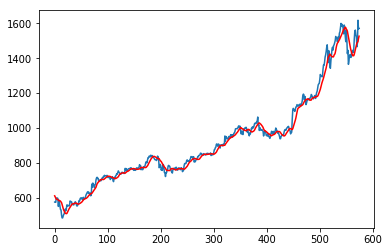

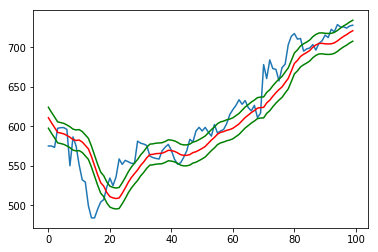

In [56]:
error = mean_squared_error(test, predictions)
rootmse = np.sqrt(error)
print('Test RMSE: %.3f' % rootmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.plot(std_high[0:100], color = 'green')
pyplot.plot(std_low[0:100], color = 'green')
pyplot.show()


In [57]:
from pandas import Series
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = Series.from_csv('E:\\Information Systems\\FinanceML\\Data\\Equity_Group\\AMZN_trial.csv', header=0)
# prepare situation
X = series.values
window = 30
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
spread_high = list()
spread_low = list()
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=568.052333, expected=534.400000
predicted=564.562333, expected=524.760000
predicted=560.912667, expected=535.980000
predicted=557.605333, expected=558.600000
predicted=556.025333, expected=551.750000
predicted=554.138333, expected=556.800000
predicted=552.114667, expected=555.000000
predicted=549.972000, expected=553.000000
predicted=549.072000, expected=553.050000
predicted=547.607000, expected=581.120000
predicted=547.954333, expected=578.550000
predicted=548.072667, expected=577.470000
predicted=548.155000, expected=575.600000
predicted=548.233333, expected=562.250000
predicted=547.061333, expected=560.300000
predicted=545.797333, expected=559.250000
predicted=544.499000, expected=558.500000
predicted=543.249000, expected=569.000000
predicted=543.882333, expected=573.570000
predicted=543.451333, expected=577.020000
predicted=543.518667, expected=569.400000
predicted=544.132000, expected=558.500000
predicted=545.008667, expected=552.000000
predicted=545.764333, expected=553

C:\Users\TEJESH\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [60]:
std_dev = np.std(amazon_data['Close'])
print("std  : ", std_dev)
spread = std_dev*0.1
print(spread)
std_high = [spread + predictions[i] for i in range(len(predictions))]
std_low = [predictions[i] - spread for i in range(len(predictions))]

std  :  265.2857634425278
26.528576344252784


Test RMSE: 52.600


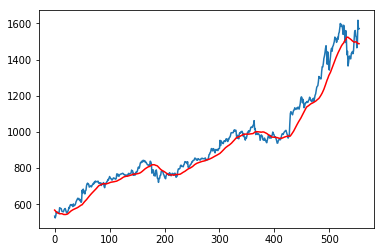

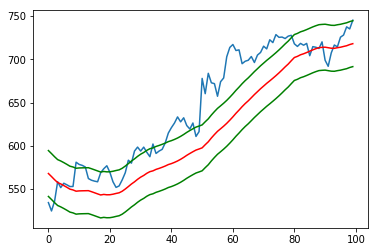

In [61]:
error = mean_squared_error(test, predictions)
rootmse = np.sqrt(error)
print('Test RMSE: %.3f' % rootmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.plot(std_high[0:100], color = 'green')
pyplot.plot(std_low[0:100], color = 'green')
pyplot.show()


In [62]:
from pandas import Series
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = Series.from_csv('E:\\Information Systems\\FinanceML\\Data\\Equity_Group\\AMZN_trial.csv', header=0)
# prepare situation
X = series.values
window = 60
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
spread_high = list()
spread_low = list()
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=565.948333, expected=594.010000
predicted=565.196833, expected=598.550000
predicted=564.601833, expected=592.600000
predicted=563.891833, expected=587.500000
predicted=563.583500, expected=602.150000
predicted=563.480000, expected=591.260000
predicted=563.042500, expected=594.000000
predicted=562.621167, expected=596.000000
predicted=562.887833, expected=603.450000
predicted=562.995333, expected=614.800000
predicted=563.730333, expected=621.050000
predicted=564.497833, expected=626.390000
predicted=565.354333, expected=633.500000
predicted=566.358500, expected=627.800000
predicted=566.865000, expected=632.480000
predicted=567.436000, expected=623.500000
predicted=567.857667, expected=619.500000
predicted=568.249333, expected=626.450000
predicted=569.523500, expected=610.920000
predicted=569.930500, expected=616.500000
predicted=570.622167, expected=678.000000
predicted=572.738833, expected=660.350000
predicted=574.874667, expected=683.900000
predicted=577.450833, expected=672

C:\Users\TEJESH\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [63]:
std_dev = np.std(amazon_data['Close'])
print("std  : ", std_dev)
spread = std_dev*0.1
print(spread)
std_high = [spread + predictions[i] for i in range(len(predictions))]
std_low = [predictions[i] - spread for i in range(len(predictions))]

std  :  265.2857634425278
26.528576344252784


Test RMSE: 83.516


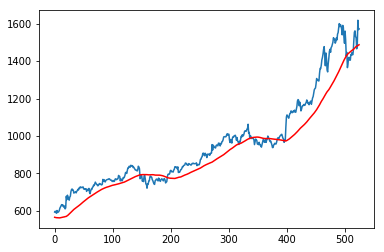

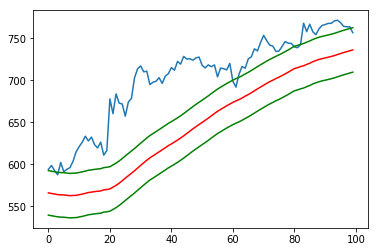

In [64]:
error = mean_squared_error(test, predictions)
rootmse = np.sqrt(error)
print('Test RMSE: %.3f' % rootmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.plot(std_high[0:100], color = 'green')
pyplot.plot(std_low[0:100], color = 'green')
pyplot.show()
